In [1]:
from comet_ml import Experiment
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up YOUR experiment - login to comet, create new project (for new exercise)
# and copy the statet command
# or just change the name of the workspace, and the API (you can find it in the settings)
experiment = Experiment(
    api_key="EnterYourAPIKey",
    project_name="exercise0",
    workspace="EnterGroupWorkspaceHere",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: The given API key EnterYourAPIKey is invalid on www.comet.com, please check it against the dashboard. Your experiment will not be logged 
For more details, please refer to: https://www.comet.com/docs/v2/api-and-sdk/python-sdk/warnings-errors/
COMET ERROR: The given API key EnterYourAPIKey is invalid on www.comet.com, please check it against the dashboard. Your experiment will not be logged 
For more details, please refer to: https://www.comet.com/docs/v2/api-and-sdk/python-sdk/warnings-errors/


In [3]:
# create noisy data
np.random.seed(1337)
x = np.linspace(-1, 1, 100)
y = 2 * x + 0.3 * np.random.randn(100)
lr = 0.1  # learning rate

In [16]:
# setup model
class Model(object):
    def __init__(self):
        # Initialize the slope to `.1`
        self.W = tf.Variable(0.1)

    def __call__(self, x):
        return self.W * x

In [17]:
# define optimization procedure
def objective(x, y):
    return tf.reduce_mean(tf.square(y - x))


# training
linear_model = Model()

for i in range(100):

    with tf.GradientTape() as tape:

        current_loss = objective(y, linear_model(x))
        experiment.log_metric("loss", current_loss)  # log metric to comet

        print("iteration:", i, "loss", current_loss)
        dW = tape.gradient(current_loss, linear_model.W)
        print("gradient", dW)
        linear_model.W.assign_sub(
            lr * dW
        )  # update model parameters assign_sub -> W-= lr * dW (gradient descent)

iteration: 0 loss tf.Tensor(1.3230761, shape=(), dtype=float32)
gradient tf.Tensor(-1.292841, shape=(), dtype=float32)
iteration: 1 loss tf.Tensor(1.1616162, shape=(), dtype=float32)
gradient tf.Tensor(-1.2049104, shape=(), dtype=float32)
iteration: 2 loss tf.Tensor(1.0213726, shape=(), dtype=float32)
gradient tf.Tensor(-1.1229603, shape=(), dtype=float32)
iteration: 3 loss tf.Tensor(0.8995569, shape=(), dtype=float32)
gradient tf.Tensor(-1.0465838, shape=(), dtype=float32)
iteration: 4 loss tf.Tensor(0.793748, shape=(), dtype=float32)
gradient tf.Tensor(-0.97540194, shape=(), dtype=float32)
iteration: 5 loss tf.Tensor(0.70184255, shape=(), dtype=float32)
gradient tf.Tensor(-0.90906155, shape=(), dtype=float32)
iteration: 6 loss tf.Tensor(0.6220136, shape=(), dtype=float32)
gradient tf.Tensor(-0.8472331, shape=(), dtype=float32)
iteration: 7 loss tf.Tensor(0.5526742, shape=(), dtype=float32)
gradient tf.Tensor(-0.7896098, shape=(), dtype=float32)
iteration: 8 loss tf.Tensor(0.49244612,

Fitted slope <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9992009>
Analytic solution 2.000860230971015


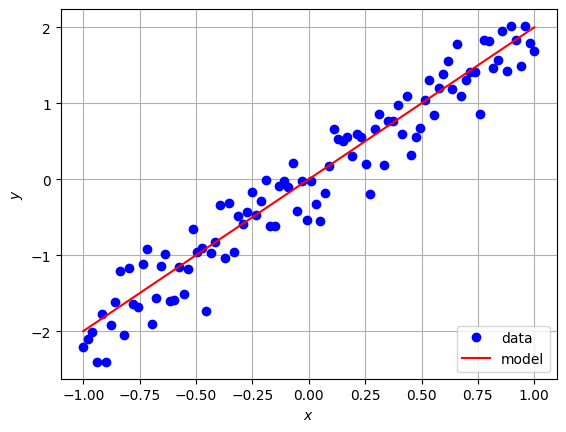

In [18]:
# evaluation
W_analytic = sum(y * x) / sum(x ** 2)  # analytic solution
print("Fitted slope", linear_model.W)
print("Analytic solution", W_analytic)


# plot data and fitted model
fig, ax = plt.subplots(1)

y_pred = linear_model(x)

ax.plot(x, y, "bo", label="data")
ax.plot(x, y_pred, "r-", label="model")
ax.set(xlabel="$x$", ylabel="$y$")
ax.grid()
ax.legend(loc="lower right")
fig.savefig("linearregression.png", bbox_inches="tight")

experiment.log_figure(figure=fig)  # log pyplot figure to comet